<a href="https://colab.research.google.com/github/pikey-msc/ValOpc/blob/main/2024-2/Procesos_Continuos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definir la función para simular la caminata aleatoria
def random_walk(n):
    # Generar pasos aleatorios +1 o -1
    X = np.random.choice([-1, 1], size=n) #X
    # Calcular los pasos de la caminata aleatoria como un acumulado
    return np.cumsum(X / np.sqrt(n))

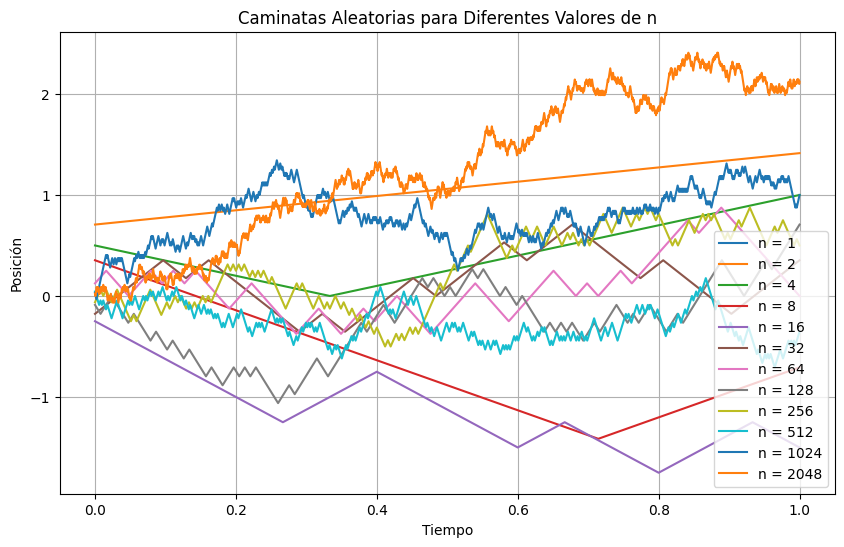

In [ ]:
# Valores de n para simular
n_values = [2**i for i in range(12) ]

# Crear una figura y un eje
plt.figure(figsize=(10, 6))

# Generar y graficar caminatas aleatorias para cada n
for n in n_values:
    # Simular la caminata aleatoria
    walk = random_walk(n)
    # Generar el eje x como puntos en el tiempo dividido por n
    time = np.linspace(0, 1, n)
    # Graficar la caminata aleatoria
    plt.plot(time, walk, label=f'n = {n}')

# Añadir etiquetas y leyenda
plt.title('Caminatas Aleatorias para Diferentes Valores de n')
plt.xlabel('Tiempo')
plt.ylabel('Posición')
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()


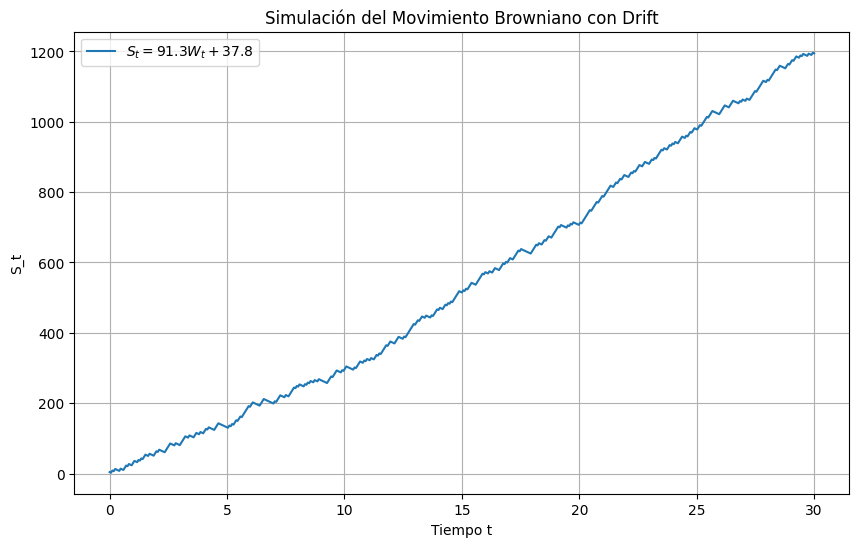

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
sigma = 91.3  # Desviación estándar del movimiento Browniano
mu = 37.8     # Tendencia o "drift"
T = 30      # Tiempo final
n = 2**9     # Número de pasos en el intervalo [0, T]
dt = T / n   # Tamaño de cada paso en tiempo

# Tiempos
t = np.linspace(0, T, n+1)

# Simulación del movimiento Browniano caminata aleatoria
W = random_walk(n+1)

# Calcular S_t
S = sigma * W + mu*t

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(t, S, label=f'$S_t = {sigma} W_t + {mu}$')
plt.title('Simulación del Movimiento Browniano con Drift')
plt.xlabel('Tiempo t')
plt.ylabel('S_t')
plt.legend()
plt.grid(True)
plt.show()

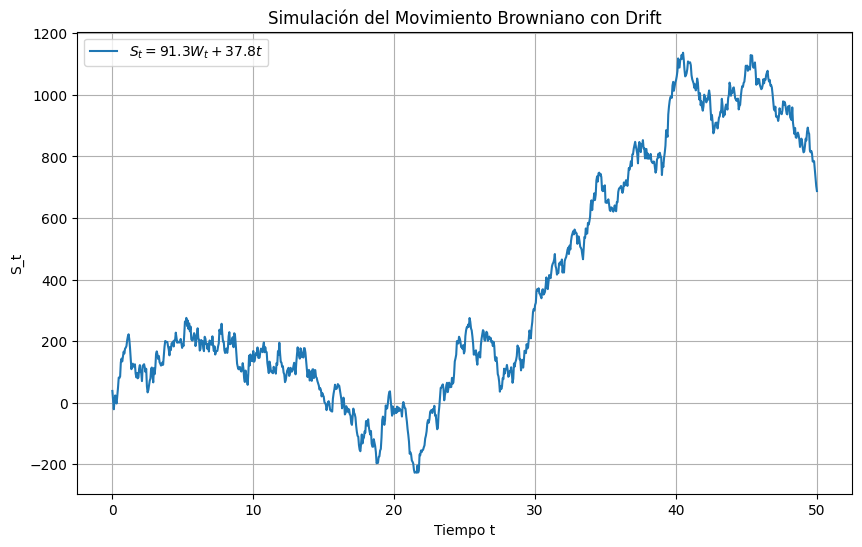

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
sigma = 91.3  # Desviación estándar del movimiento Browniano
mu = 37.8     # Tendencia o "drift"
T = 50       # Tiempo final
n = 1000     # Número de pasos en el intervalo [0, T]
dt = T / n   # Tamaño de cada paso en tiempo

# Tiempos
t = np.linspace(0, T, n+1)

# Simulación del movimiento Browniano
W = np.zeros(n+1)
for i in range(1, n+1):
    W[i] = W[i-1] + np.random.normal(0, np.sqrt(dt))

# Calcular S_t
S = sigma * W + mu

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(t, S, label=f'$S_t = {sigma} W_t + {mu} t$')
plt.title('Simulación del Movimiento Browniano con Drift')
plt.xlabel('Tiempo t')
plt.ylabel('S_t')
plt.legend()
plt.grid(True)
plt.show()


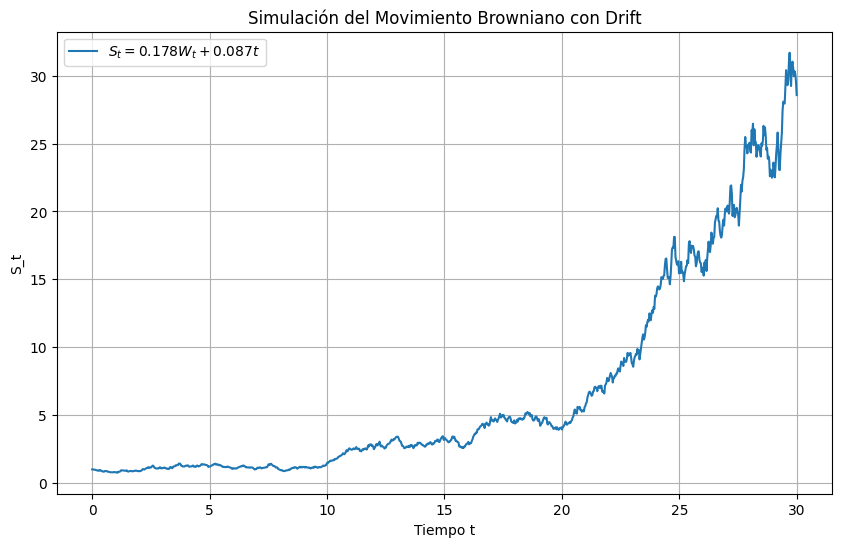

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
sigma = 0.178  # Desviación estándar del movimiento Browniano
mu = 0.087     # Tendencia o "drift"
T = 30       # Tiempo final
n = 1000     # Número de pasos en el intervalo [0, T]
dt = T / n   # Tamaño de cada paso en tiempo

# Tiempos
t = np.linspace(0, T, n+1)

# Simulación del movimiento Browniano
W = np.zeros(n+1)
for i in range(1, n+1):
    W[i] = W[i-1] + np.random.normal(0, np.sqrt(dt))

# Calcular S_t
S = np.exp(sigma * W + mu*t)

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(t, S, label=f'$S_t = {sigma} W_t + {mu} t$')
plt.title('Simulación del Movimiento Browniano con Drift')
plt.xlabel('Tiempo t')
plt.ylabel('S_t')
plt.legend()
plt.grid(True)
plt.show()


# Diferencia en integración

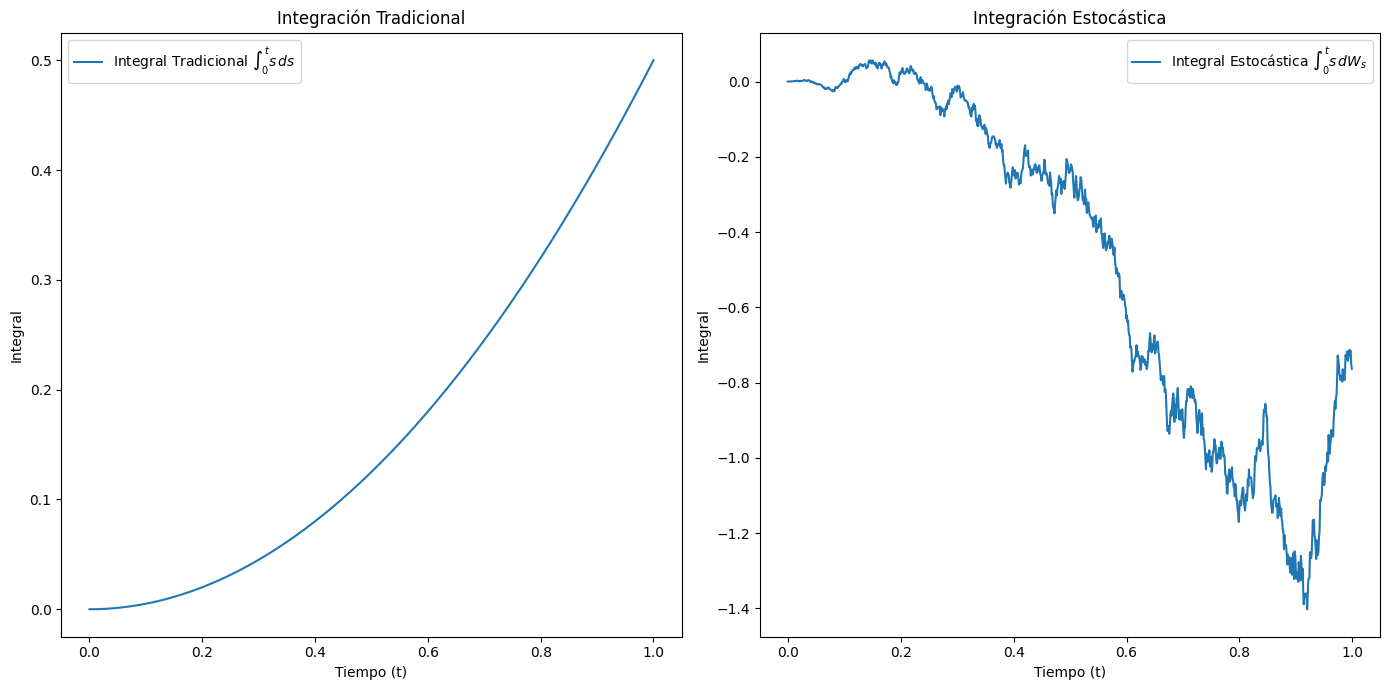

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Configuración básica para la simulación
np.random.seed(0)
n = 1000  # Número de pasos
dt = 1/n  # Tamaño del paso temporal
t = np.linspace(0, 1, n)  # Vector de tiempo

# Función lineal
f = t

# Simulación de un movimiento Browniano
W = np.cumsum(norm.rvs(scale=np.sqrt(dt), size=n))

# Integración tradicional (Riemann)
integral_tradicional = np.cumsum(f * dt)

# Integración estocástica (aproximación de Euler-Maruyama)
integral_estocastica = np.cumsum(f[:-1] * np.diff(W))

# Gráficos
plt.figure(figsize=(14, 7))

# Integración tradicional
plt.subplot(1, 2, 1)
plt.plot(t, integral_tradicional, label='Integral Tradicional $\int_0^t s \, ds$')
plt.title("Integración Tradicional")
plt.xlabel("Tiempo (t)")
plt.ylabel("Integral")
plt.legend()

# Integración estocástica
plt.subplot(1, 2, 2)
plt.plot(t[:-1], integral_estocastica, label='Integral Estocástica $\int_0^t s \, dW_s$')
plt.title("Integración Estocástica")
plt.xlabel("Tiempo (t)")
plt.ylabel("Integral")
plt.legend()

plt.tight_layout()
plt.show()


# Aproximación de $(dW_t)^2=dt$

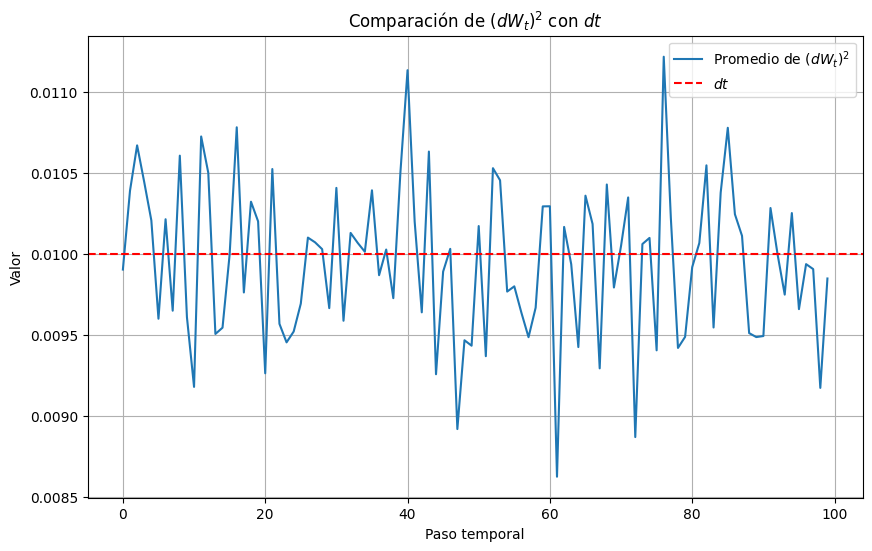

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Configuración básica
np.random.seed(0)  # Semilla para reproducibilidad
n_simulaciones = 1000  # Número de trayectorias
n_pasos = 100  # Número de pasos en el tiempo
T = 1.0  # Tiempo total
dt = T / n_pasos  # Tamaño de paso temporal

# Simular el movimiento Browniano
dW = np.random.normal(0, np.sqrt(dt), (n_simulaciones, n_pasos))  # Incrementos del MB
W = np.cumsum(dW, axis=1)  # Proceso de MB

# Calcular (dW_t)^2 y comparar con dt
dW2 = dW**2
promedio_dW2 = np.mean(dW2, axis=0)  # Promedio sobre todas las simulaciones

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.plot(promedio_dW2, label='Promedio de $(dW_t)^2$')
plt.axhline(dt, color='r', linestyle='--', label='$dt$')
plt.title('Comparación de $(dW_t)^2$ con $dt$')
plt.xlabel('Paso temporal')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.show()


In [5]:
dW

array([[ 0.17640523,  0.04001572,  0.0978738 , ...,  0.17858705,
         0.01269121,  0.04019894],
       [ 0.18831507, -0.13477591, -0.1270485 , ...,  0.08235042,
         0.21632359,  0.13365279],
       [-0.03691818, -0.02393792,  0.10996596, ...,  0.05829537,
        -0.0399449 ,  0.03700559],
       ...,
       [ 0.12893458,  0.03316683, -0.12735449, ..., -0.06791628,
         0.03703728, -0.03813745],
       [-0.12939769, -0.04187581,  0.02346391, ..., -0.04555746,
        -0.03628091, -0.22633162],
       [-0.06448136, -0.07452431,  0.02334146, ...,  0.0726182 ,
        -0.11678305, -0.12852076]])